<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-24 04:36:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  64.8MB/s    in 3.1s    

2025-03-24 04:36:45 (64.8 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 137.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 172.8 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 155.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 125.2 MB/s eta 0:00:00


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


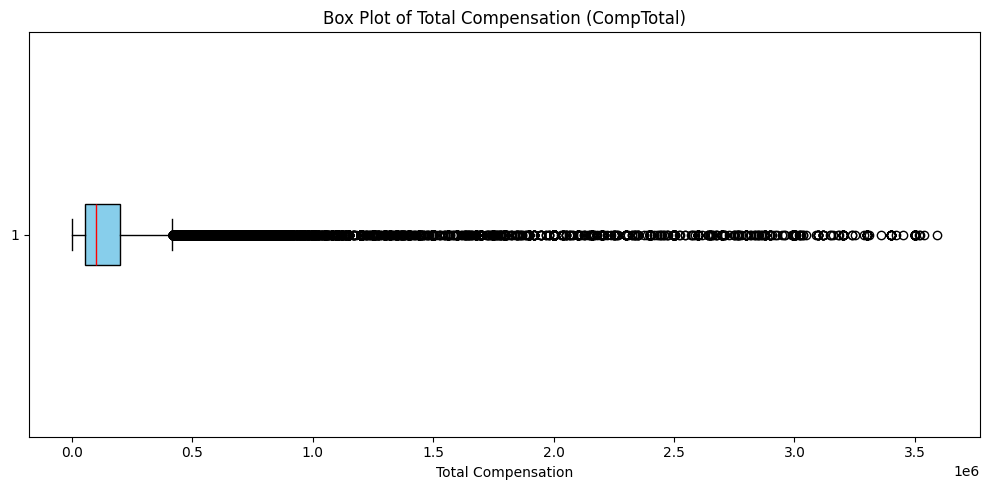

In [8]:
# データベース接続と CompTotal の取得
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# 数値に変換（文字列などをNaNに）
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 欠損値を除去
df_clean = df['CompTotal'].dropna()

# 外れ値が極端に大きい場合は上位5%を除去（任意）
df_filtered = df_clean[df_clean < df_clean.quantile(0.95)]

# 箱ひげ図の描画
plt.figure(figsize=(10, 5))
plt.boxplot(df_filtered, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


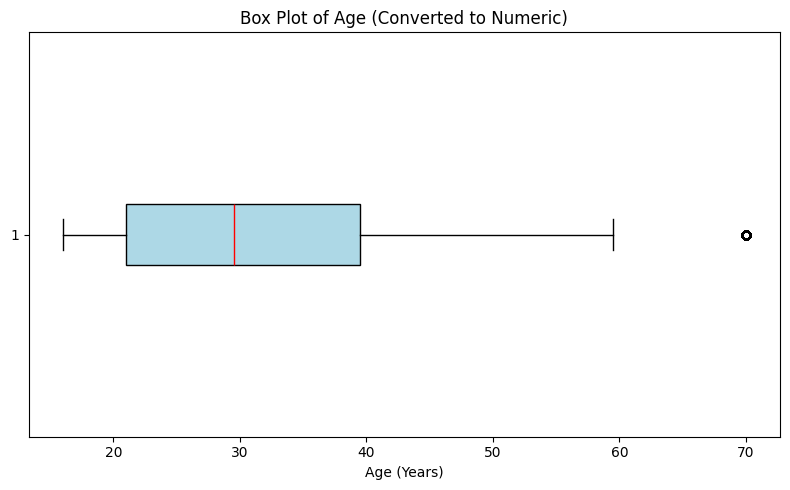

In [11]:
# データベース接続
query = "SELECT Age FROM main"
df = pd.read_sql_query(query, conn)

# 年齢カテゴリ → 数値（中央値）への変換
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
    # 'Prefer not to say' は intentionally 含めない（NaNになる）
}

# 数値に変換
df['AgeNumeric'] = df['Age'].map(age_map)

# NaN（"Prefer not to say" など）を除外
df_clean = df['AgeNumeric'].dropna()

# 箱ひげ図の描画
plt.figure(figsize=(8, 5))
plt.boxplot(df_clean, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Age (Converted to Numeric)')
plt.xlabel('Age (Years)')
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

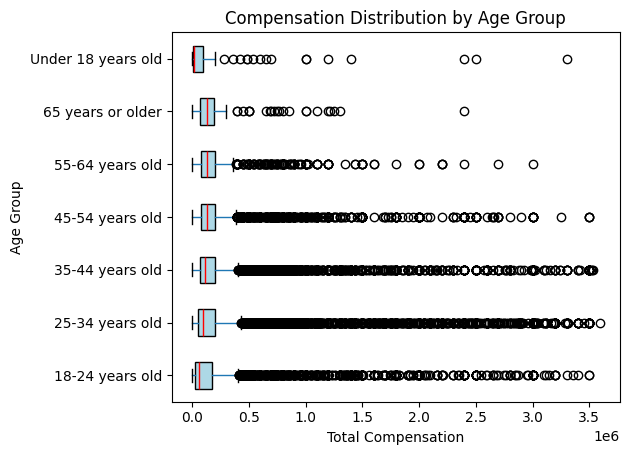

In [12]:
# データベースから Age と CompTotal を取得
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# CompTotal を数値に変換
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 不要なカテゴリ（例: "Prefer not to say"）を除外
valid_age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(valid_age_groups)]

# 欠損値を除外
df = df.dropna(subset=['CompTotal'])

# 外れ値除外（上位5%カット）※任意
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]

# 年齢グループの順序を指定して表示
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

# 箱ひげ図の描画
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Age', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'),
           vert=False)

plt.title('Compensation Distribution by Age Group')
plt.suptitle('')  # デフォルトの副タイトルを消す
plt.xlabel('Total Compensation')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

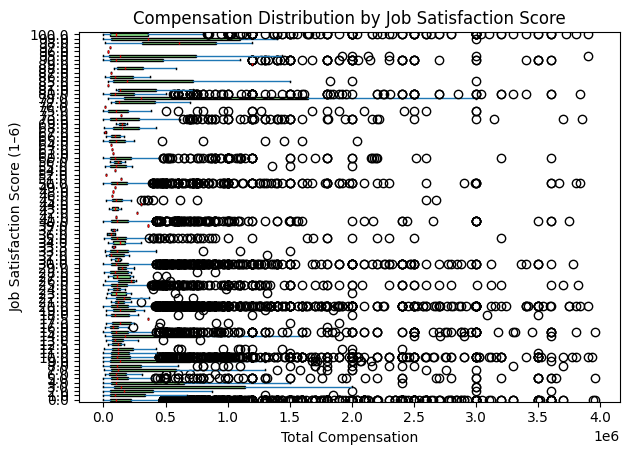

In [13]:
# データ取得
query = "SELECT CompTotal, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

# 数値変換
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# 欠損除去
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# 外れ値除去（CompTotalの上位5%を除外）
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]

# JobSatPoints_6 を昇順でソートして描画
df_sorted = df.sort_values('JobSatPoints_6')

# box plot の描画
plt.figure(figsize=(10, 6))
df.boxplot(column='CompTotal', by='JobSatPoints_6', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightgreen', color='black'),
           medianprops=dict(color='red'),
           vert=False)

plt.title('Compensation Distribution by Job Satisfaction Score')
plt.suptitle('')  # 自動サブタイトルを消す
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction Score (1–6)')
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

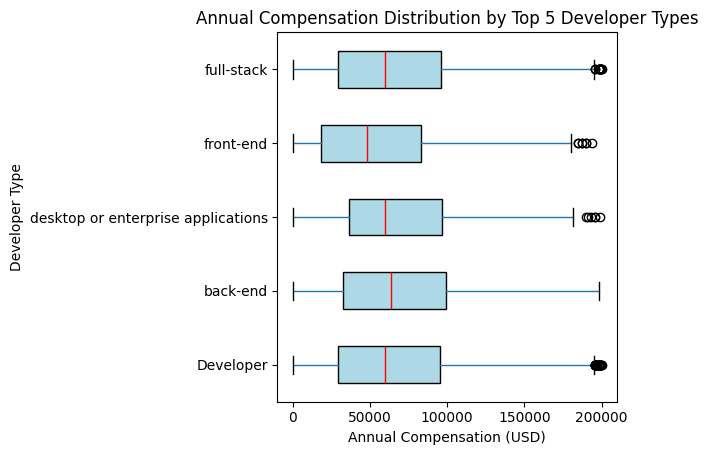

In [6]:
# データ取得
query = "SELECT DevType, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

# 年収を数値に変換
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# 欠損値を除去
df = df.dropna(subset=['DevType', 'ConvertedCompYearly'])

# DevType をカンマで分割してリスト化 → 展開（explode）
df['DevTypeList'] = df['DevType'].str.split(',')
df = df.explode('DevTypeList')
df['DevTypeList'] = df['DevTypeList'].str.strip()  # 空白除去

# 上位5職種を取得
top5_devtypes = df['DevTypeList'].value_counts().head(5).index.tolist()

# 上位5職種のみに絞る
df_top5 = df[df['DevTypeList'].isin(top5_devtypes)]

# 外れ値除去（上位5%を除く）
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < df_top5['ConvertedCompYearly'].quantile(0.95)]

# BoxPlotの描画
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevTypeList', grid=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'),
                vert=False)

plt.title('Annual Compensation Distribution by Top 5 Developer Types')
plt.suptitle('')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Developer Type')
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

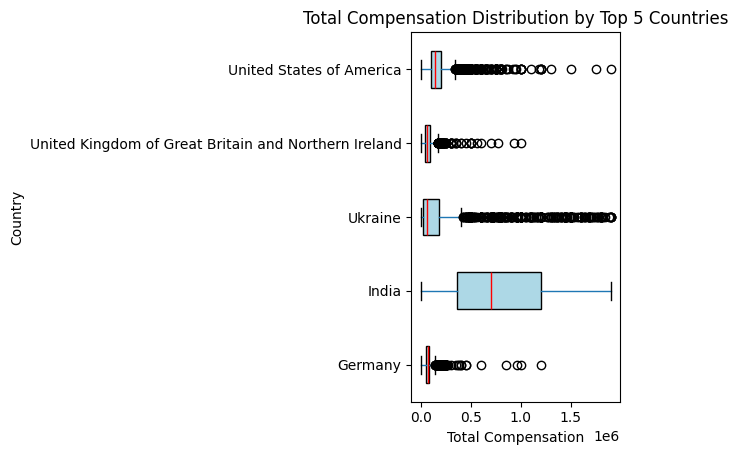

In [7]:
# データ取得
query = "SELECT Country, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# CompTotal を数値に変換
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 欠損を除去
df = df.dropna(subset=['Country', 'CompTotal'])

# Country の出現数トップ5を抽出
top5_countries = df['Country'].value_counts().head(5).index.tolist()

# 上位5か国のデータだけにフィルタ
df_top5 = df[df['Country'].isin(top5_countries)]

# 外れ値除去（CompTotalの上位5%を除外）
df_top5 = df_top5[df_top5['CompTotal'] < df_top5['CompTotal'].quantile(0.95)]

# BoxPlot 描画
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='CompTotal', by='Country', grid=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'),
                vert=False)

plt.title('Total Compensation Distribution by Top 5 Countries')
plt.suptitle('')
plt.xlabel('Total Compensation')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_298/1939902392.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

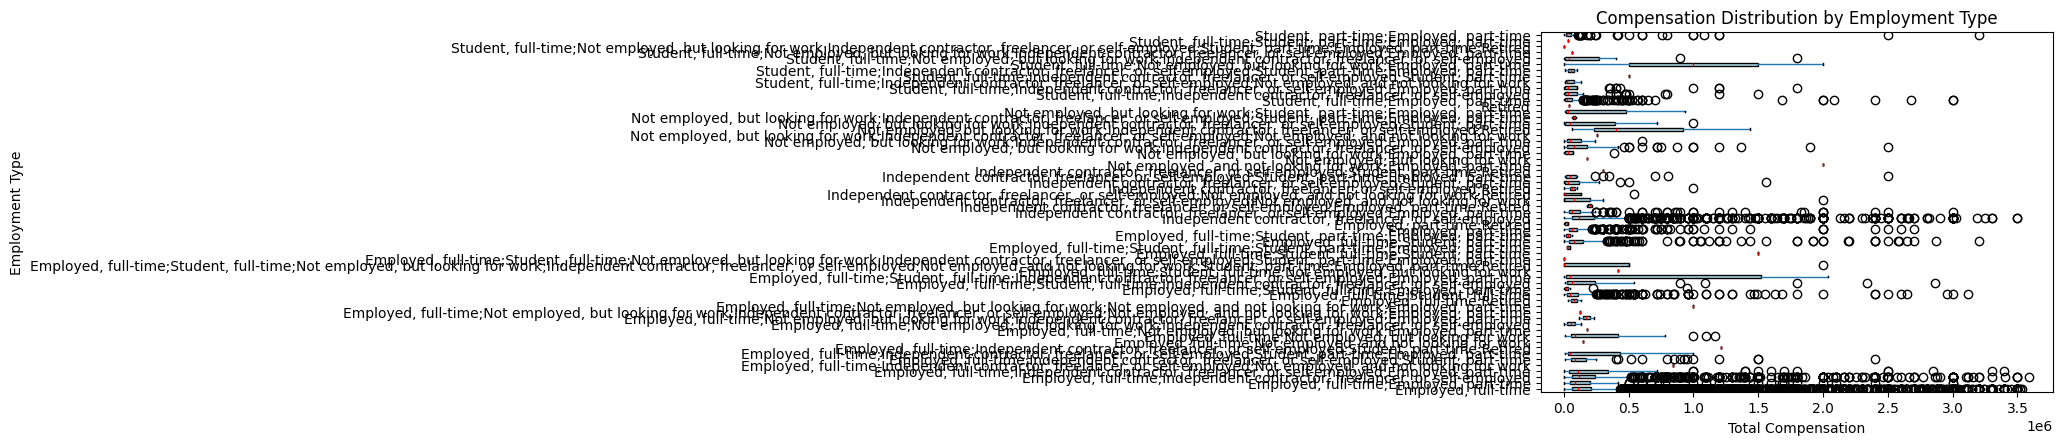

In [8]:
# データ取得
query = "SELECT Employment, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# CompTotal を数値に変換
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 欠損を除去
df = df.dropna(subset=['Employment', 'CompTotal'])

# 外れ値（上位5%）を除去
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]

# Employment カテゴリの出現数順に並べる
employment_order = df['Employment'].value_counts().index.tolist()

# 箱ひげ図を描画
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Employment', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'),
           vert=False)

plt.title('Compensation Distribution by Employment Type')
plt.suptitle('')
plt.xlabel('Total Compensation')
plt.ylabel('Employment Type')
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

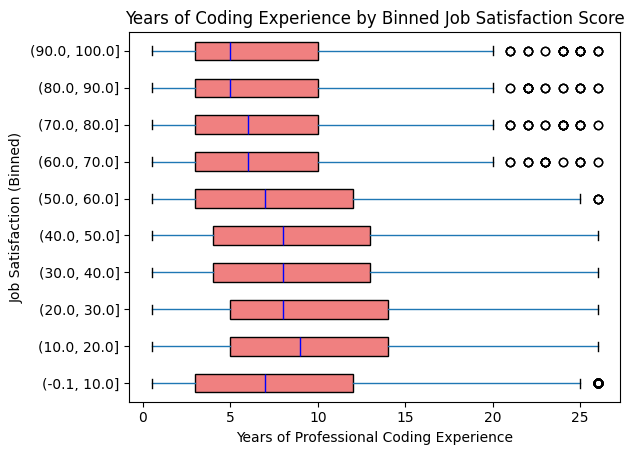

In [10]:
# データ取得
query = "SELECT JobSatPoints_6, YearsCodePro FROM main"
df = pd.read_sql_query(query, conn)

# YearsCodePro を数値に変換（文字列対応）
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# 欠損除去
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# 経験年数の外れ値除去（上位5%）
df = df[df['YearsCodePro'] < df['YearsCodePro'].quantile(0.95)]

# JobSatPoints_6 を 10カテゴリにビン分割（等間隔）
df['JobSatBin'] = pd.cut(df['JobSatPoints_6'], bins=10)

# 箱ひげ図の描画
plt.figure(figsize=(10, 6))
df.boxplot(column='YearsCodePro', by='JobSatBin', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightcoral', color='black'),
           medianprops=dict(color='blue'),
           vert=False)

plt.title('Years of Coding Experience by Binned Job Satisfaction Score')
plt.suptitle('')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Binned)')
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
